# Data Visualization

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [39]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'n90pol.csv':'https://storage.googleapis.com/aipi_datasets/n90pol.csv',
        'anscombe.csv':'https://storage.googleapis.com/aipi_datasets/anscombe.csv',
        'CCPP_data.csv':'https://storage.googleapis.com/aipi_datasets/CCPP_data.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

## Anscombe's quartet

Let's compare 4 datasets to see where they are similar and different

In [3]:
data = pd.read_csv('anscombe.csv')
data.head()

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47


In [4]:
# Split the dataframe into the 4 datasets
set1 = data[['x1','y1']]
set2 = data[['x2','y2']]
set3 = data[['x3','y3']]
set4 = data[['x4','y4']]

In [5]:
# Calculate statistics for each dataset
for i,s in enumerate([set1,set2,set3,set4]):
    mean_x,mean_y = s.mean(axis=0)
    var_x,var_y = s.var(axis=0)
    cor,_ = pearsonr(s.iloc[:,0],s.iloc[:,1])
    #cor = s.corr(method='pearson').iloc[0,1]
    print('Set {}'.format(i+1))
    print('Mean x: {:.3f}, Mean y: {:.3f}'.format(mean_x,mean_y))
    print('Variance x: {:.3f}, Variance y: {:.3f}'.format(var_x,var_y))
    print('Correlation of x and y: {:.3f}'.format(cor))
    print()

Set 1
Mean x: 9.000, Mean y: 7.501
Variance x: 11.000, Variance y: 4.127
Correlation of x and y: 0.816

Set 2
Mean x: 9.000, Mean y: 7.501
Variance x: 11.000, Variance y: 4.128
Correlation of x and y: 0.816

Set 3
Mean x: 9.000, Mean y: 7.500
Variance x: 11.000, Variance y: 4.123
Correlation of x and y: 0.816

Set 4
Mean x: 9.000, Mean y: 7.501
Variance x: 11.000, Variance y: 4.123
Correlation of x and y: 0.817



Based on the statistics, it looks like these datasets should be almost identical.  Let's model each with a simple linear regression line.

In [9]:
# Model each using a linear regression (y = mx + b)
for i,s in enumerate([set1,set2,set3,set4]):
    model = LinearRegression()
    model.fit(np.array(s.iloc[:,0]).reshape(-1,1),np.array(s.iloc[:,1]))
    m = model.coef_.item()
    b = model.intercept_.item()
    r2 = model.score(np.array(s.iloc[:,0]).reshape(-1,1),np.array(s.iloc[:,1]))
    print('Set {}: y = {:.2f}x + {:.2f}. R-squared: {:.2f}'.
          format(i+1,m,b,r2))

Set 1: y = 0.50x + 3.00. R-squared: 0.67
Set 2: y = 0.50x + 3.00. R-squared: 0.67
Set 3: y = 0.50x + 3.00. R-squared: 0.67
Set 4: y = 0.50x + 3.00. R-squared: 0.67


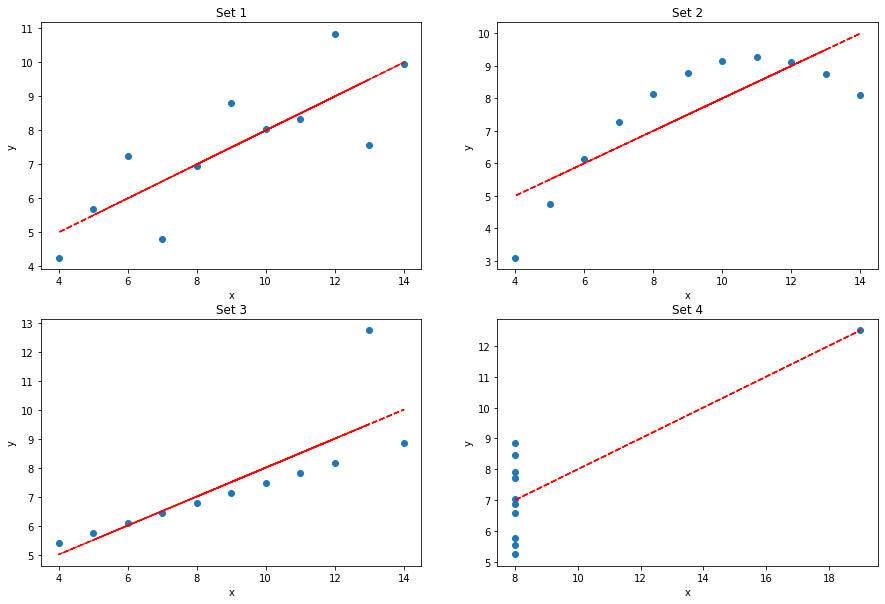

In [10]:
# Plot each using a scatterplot
# Set up grid
fig,ax = plt.subplots(2,2,figsize=(15,10))

# Plot each dataset
for i,s in enumerate([set1,set2,set3,set4]):
    axis=ax[i//2,i%2] #Set the axis to the grid location
    axis.scatter(s.iloc[:,0], s.iloc[:,1])
    p = np.poly1d([m,b])
    axis.plot(s.iloc[:,0],p(s.iloc[:,0]),"r--")
    axis.set_xlabel('x')
    axis.set_ylabel('y')
    axis.set_title('Set {}'.format(i+1))

## Density Estimation

The file n90pol.csv contains information on 90 university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views. The variables amygdala and acc indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar body-type variables. The variable orientation gives the students' political orientation on a five-point scale from 1 (very conservative) to 5 (very liberal).

In [22]:
student_data = pd.read_csv('n90pol.csv')
student_data.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


### Explore features (amygdala and acc)

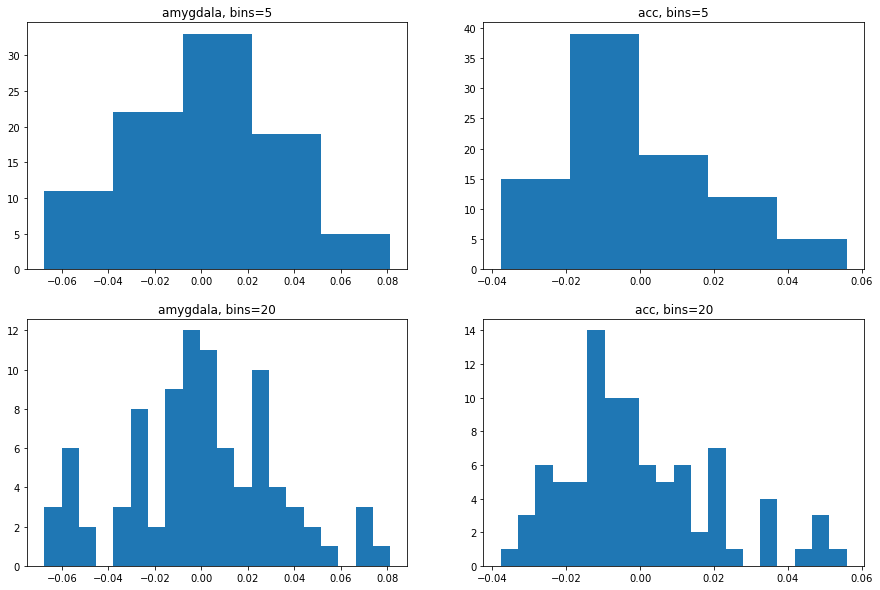

In [23]:
# View histogram of each feature amygdala and acc
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].hist(student_data['amygdala'],bins=5)
ax[0,0].set_title('amygdala, bins=5')
ax[0,1].hist(student_data['acc'],bins=5)
ax[0,1].set_title('acc, bins=5')
ax[1,0].hist(student_data['amygdala'],bins=20)
ax[1,0].set_title('amygdala, bins=20')
ax[1,1].hist(student_data['acc'],bins=20)
ax[1,1].set_title('acc, bins=20')
plt.show()

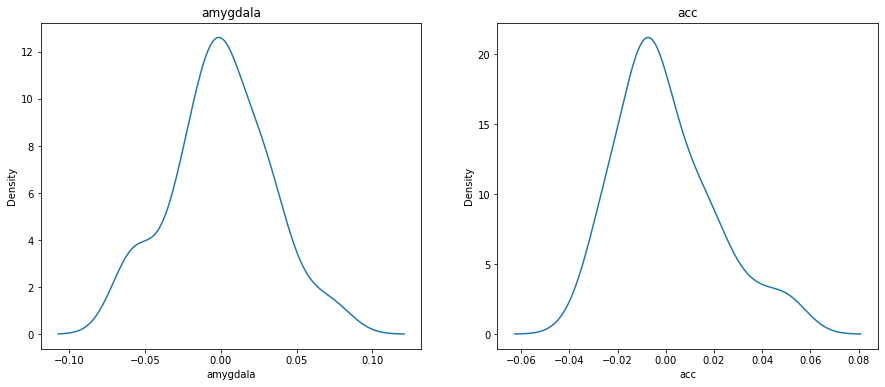

In [24]:
# View KDE plot of amygdala and acc
fig,ax = plt.subplots(1,2,figsize=(15,6))
for i,col in enumerate(['amygdala','acc']):
    sns.kdeplot(student_data[col],bw=None,ax=ax[i])
    ax[i].set_title(col)
plt.show()

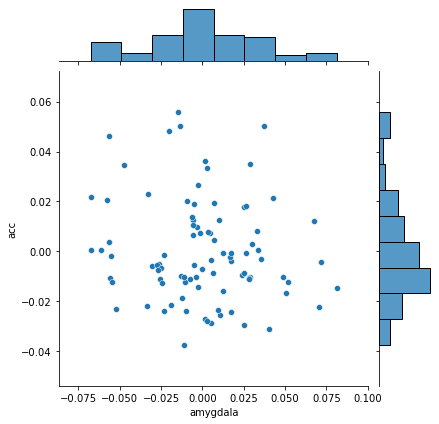

In [25]:
# Show scatterplot and histograms for the two variables using seaborn
sns.jointplot(x='amygdala',y='acc',data=student_data, kind='scatter')
plt.show()

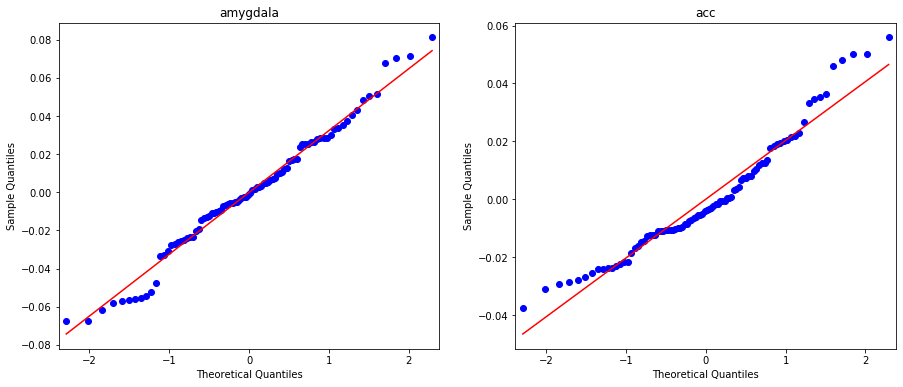

In [26]:
# Can my data be approximated by a Gaussian distribution? Use a Q-Q plot
# Set up grid
fig,ax = plt.subplots(1,2,figsize=(15,6))
# Make lineplots for each signal
for i,col in enumerate(['amygdala','acc']):
    qqplot(data=student_data[col],ax=ax[i%2],line='s')
    ax[i%2].set_title(col)
plt.show()

### Explore response (orientation)

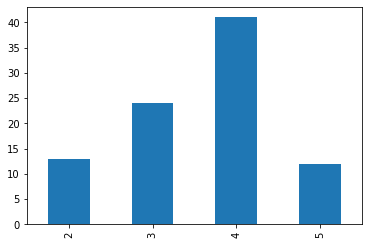

In [27]:
# Bar chart of counts for each orientation
student_data['orientation'].value_counts().sort_index().plot(kind='bar')
plt.show()

### Explore relationship between features and response

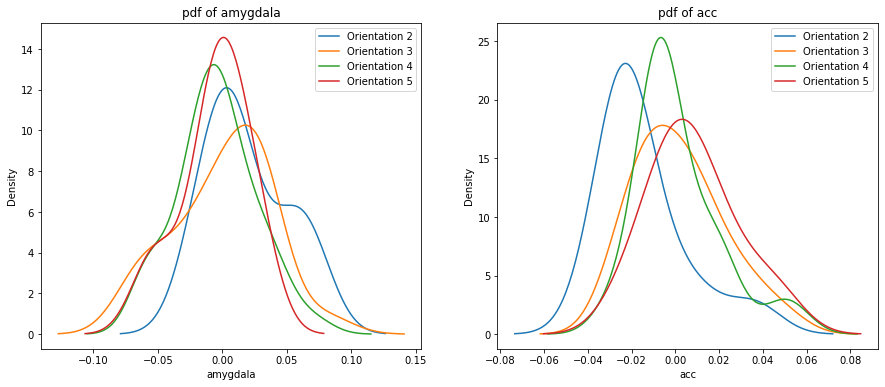

In [28]:
# Plot conditional distribution of volume of amygdala conditioned on orientation
# Use the auto-set bandwidth
fig,ax = plt.subplots(1,2,figsize=(15,6))
for i,col in enumerate(['amygdala','acc']):
    sns.kdeplot(student_data.loc[student_data.orientation==1,col],ax=ax[i])
    sns.kdeplot(student_data.loc[student_data.orientation==2,col],ax=ax[i])
    sns.kdeplot(student_data.loc[student_data.orientation==3,col],ax=ax[i])
    sns.kdeplot(student_data.loc[student_data.orientation==4,col],ax=ax[i])
    sns.kdeplot(student_data.loc[student_data.orientation==5,col],ax=ax[i])
    ax[i].legend(labels=['Orientation 2','Orientation 3','Orientation 4','Orientation 5'])
    ax[i].set_title('pdf of {}'.format(col))
plt.show()

## Correlation Example

Data available at https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

The dataset contains data collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three ambient variables affect the GT performance.

Features consist of hourly average ambient variables 
- AT: Ambient Temperature in °C,
- AP: Ambient Pressure in milibar,
- RH: Relative Humidity in %
- V: Exhaust Vacuum in cm Hg
- PE (target): Net hourly electrical energy output in MW  

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [47]:
# Read in the data
ccpp_data = pd.read_csv('CCPP_data.csv')
ccpp_data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


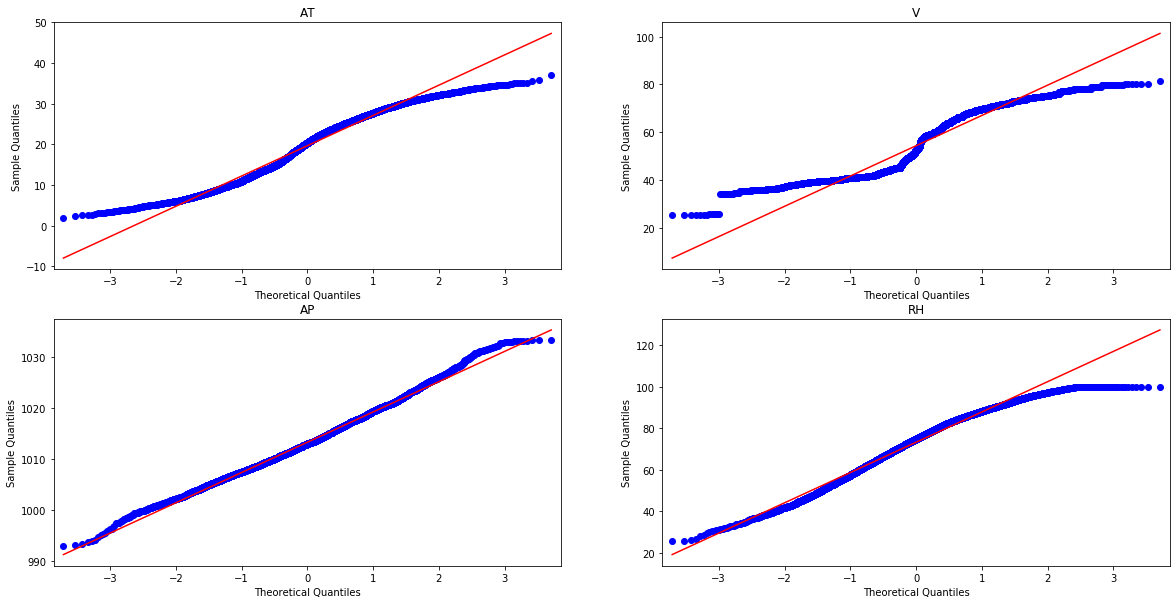

In [48]:
# Can my data be approximated by a Gaussian distribution? Use a Q-Q plot
# Set up grid
fig,ax = plt.subplots(2,2,figsize=(20,10))
# Make lineplots for each signal
for i,col in enumerate(['AT','V','AP','RH']):
    qqplot(data=ccpp_data[col],ax=ax[i//2,i%2],line='s')
    ax[i//2,i%2].set_title(col)
plt.show()

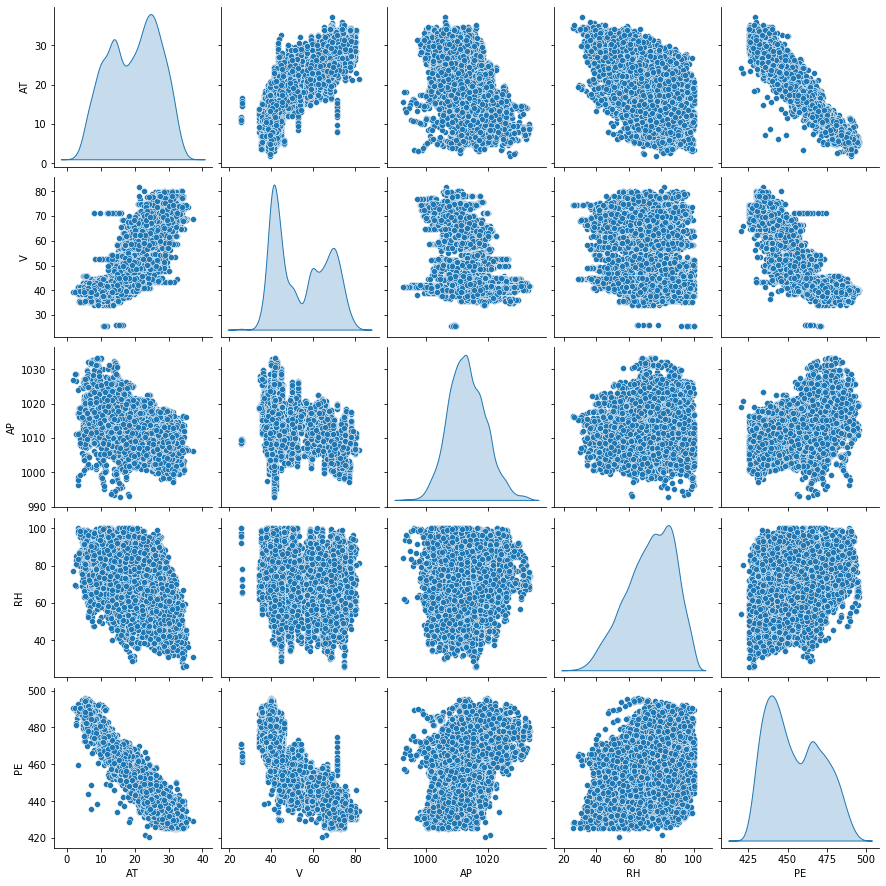

In [49]:
# Display a pairplot to look at relationships between variables
sns.pairplot(data=ccpp_data,diag_kind='kde')
plt.show()

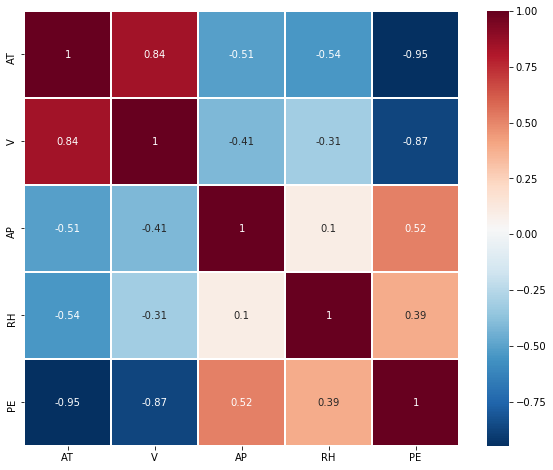

In [50]:
# Examine correlations between variables using correlation matrix
plt.figure(figsize=(10,8))
cm = ccpp_data.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()